[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ih8l1\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!



Readability Scores:

File: ./Text_Files\fomcminutes20140129.txt
  Flesch-Kincaid Grade Level: 14.60
  Flesch Reading Ease: 36.52
  Gunning Fog Index: 12.46
  SMOG Index: 16.50
  Coleman-Liau Index: 14.51
  Automated Readability Index: 18.00
  Dale-Chall Readability Score: 7.32

File: ./Text_Files\fomcminutes20140319.txt
  Flesch-Kincaid Grade Level: 13.60
  Flesch Reading Ease: 39.16
  Gunning Fog Index: 11.14
  SMOG Index: 15.70
  Coleman-Liau Index: 14.34
  Automated Readability Index: 16.70
  Dale-Chall Readability Score: 6.89

File: ./Text_Files\fomcminutes20140430.txt
  Flesch-Kincaid Grade Level: 14.00
  Flesch Reading Ease: 38.25
  Gunning Fog Index: 12.16
  SMOG Index: 16.00
  Coleman-Liau Index: 14.86
  Automated Readability Index: 17.40
  Dale-Chall Readability Score: 7.90

File: ./Text_Files\fomcminutes20140618.txt
  Flesch-Kincaid Grade Level: 12.80
  Flesch Reading Ease: 46.71
  Gunning Fog Index: 11.37
  SMOG Index: 15.40
  Coleman-Liau Index: 13.18
  Automated Readabili

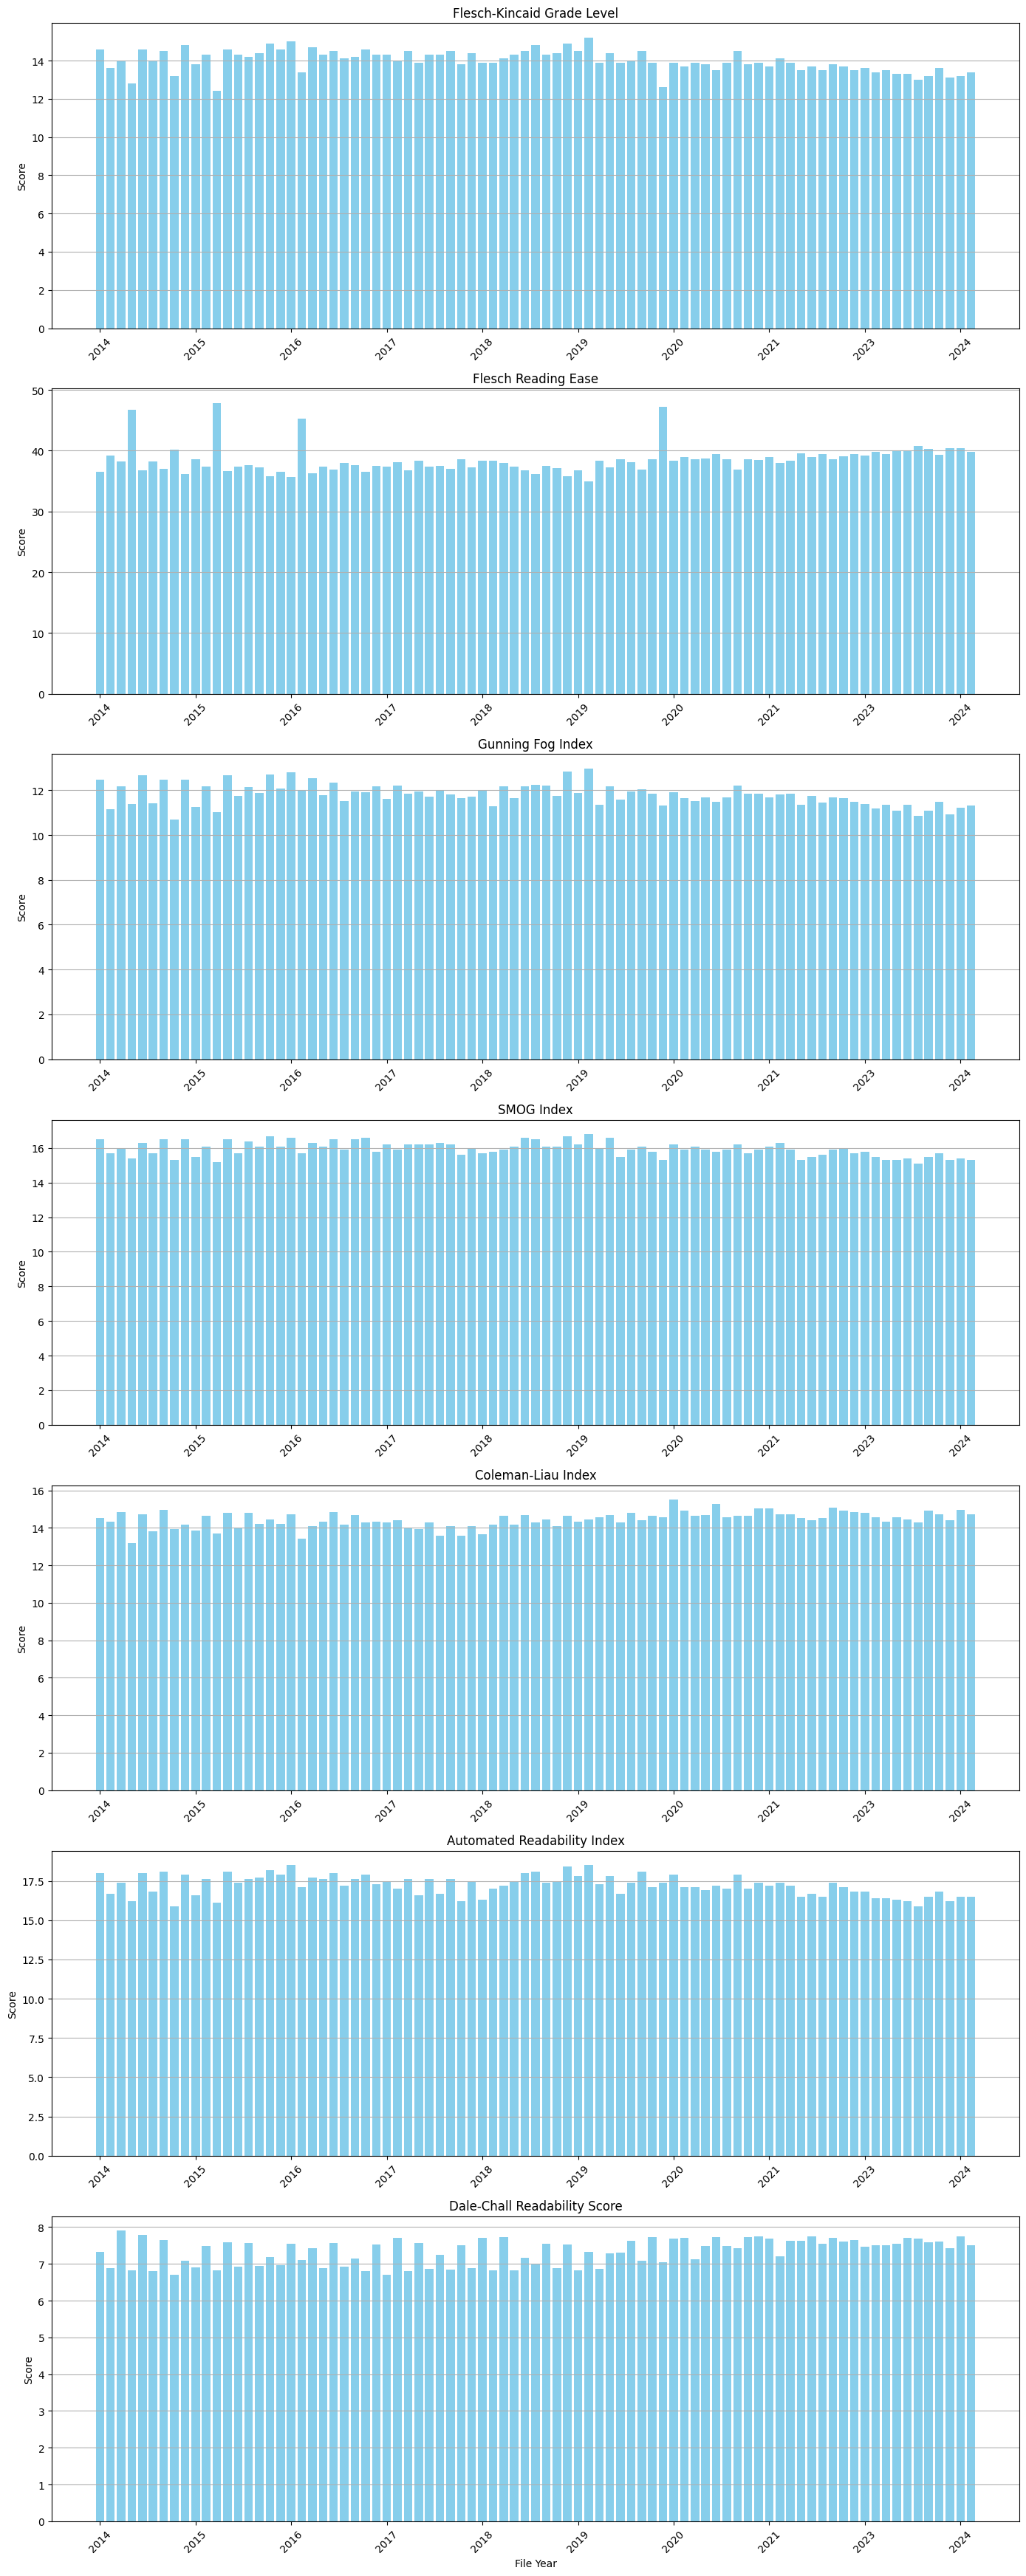

In [2]:
import os
import glob
import nltk
import textstat
import matplotlib.pyplot as plt

# Ensure you have the necessary nltk data
nltk.download('punkt')

# Define paths
project_folder = './'  # Modify this if your project folder is located elsewhere
text_files_folder = os.path.join(project_folder, 'Text_Files')

# Function to read file
def read_file(file_path):
    try:
        with open(file_path, 'r', encoding='utf-8') as file:
            content = file.read().strip()
            return content
    except Exception as e:
        print(f"Error reading {file_path}: {e}")
        return ""

# Read files in Text_Files
text_files_paths = glob.glob(os.path.join(text_files_folder, '*.txt'))
file_contents = [read_file(file_path) for file_path in text_files_paths]

# Filter out empty texts
file_contents = [text for text in file_contents if text]
text_files_paths = [file_path for file_path, text in zip(text_files_paths, file_contents) if text]

if not text_files_paths:
    raise ValueError("No valid content in Text_Files.")

# Calculate readability scores
readability_results = {}
for file_path, content in zip(text_files_paths, file_contents):
    scores = {
        'Flesch-Kincaid Grade Level': textstat.flesch_kincaid_grade(content),
        'Flesch Reading Ease': textstat.flesch_reading_ease(content),
        'Gunning Fog Index': textstat.gunning_fog(content),
        'SMOG Index': textstat.smog_index(content),
        'Coleman-Liau Index': textstat.coleman_liau_index(content),
        'Automated Readability Index': textstat.automated_readability_index(content),
        'Dale-Chall Readability Score': textstat.dale_chall_readability_score(content)
    }
    readability_results[file_path] = scores

# Output the readability scores
print("\nReadability Scores:")
for file_path, scores in readability_results.items():
    print(f"\nFile: {file_path}")
    for score_name, score_value in scores.items():
        print(f"  {score_name}: {score_value:.2f}")

# Extract simplified file names and counts
def simplify_name(name):
    # Example extraction: assume format 'fomcminutesYYYYMMDD.txt' -> extract 'YYYY'
    return name[-12:-8] if len(name) >= 12 else name

simplified_names = [simplify_name(os.path.basename(path)) for path in text_files_paths]
score_names = list(next(iter(readability_results.values())).keys())

# Ensure data consistency
print("\nData Consistency Check:")
for name, scores in zip(simplified_names, readability_results.values()):
    print(f"File Year: {name}, Scores: {scores}")

# Prepare data for plotting
scores_dict = {name: [] for name in score_names}
for scores in readability_results.values():
    for score_name, score_value in scores.items():
        scores_dict[score_name].append(score_value)

# Plot each readability score
num_plots = len(score_names)
fig, axes = plt.subplots(num_plots, 1, figsize=(14, num_plots * 5))

for i, score_name in enumerate(score_names):
    ax = axes[i]
    ax.bar(range(len(simplified_names)), scores_dict[score_name], color='skyblue')
    ax.set_title(score_name)
    ax.set_ylabel('Score')
    ax.grid(axis='y')
    ax.set_xticks(range(0, len(simplified_names), 9))
    ax.set_xticklabels([simplified_names[j] for j in range(0, len(simplified_names), 9)], rotation=45)

plt.xlabel('File Year')
plt.tight_layout()
plt.show()


